# <font color = "lime"> INTRODUÇÃO </font>
---

Este Colab notebook faz parte de um trabalho para a disciplina de Cálculo 3, cuja temática é <font color = "lime">`Método de Euler para Solução de Problemas de EDO com PVI`</font>. Aqui, pode-se encontrar:
+ Implementação do Método de Euler Explícito
+ Implementação do Método de Euler Implícito + Método de Newton
+ Função para o cálculo numérico de derivadas centradas
+ Plots dos gráficos dos experimentos

Para ir diretamente para uma seção específica, selecione-a no botão de "índice" posicionado na barra lateral esquerda.

Caso os resultados não estejam pré-carregados nas células, ou por algum outro motivo seja necessário executar os códigos novamente, recomenda-se executar todas as células na ordem em que aparecem para evitar erros de dependência de código. Ou então, execute todas de uma vez usando o atalho `Ctrl + F9`.
<br><br><br>

**Autores:**
+ [Florindo Rian Silva Carreteiro](https://github.com/florindorian)
+ [Myrna Gabrielle Bastos de Castro](https://github.com/gabriellebcastro)
+ [Paulo Beckman Santos Baia](https://github.com/paulobeckman)

**Publicado em:** Fevereiro de 2025

**Última atualização:** 27/02/2025

## <font color='lime'>Bibliotecas</font>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from time import time

---
## <font color='lime'>Métodos Numéricos</font>

In [ ]:
def derivada(func, *args, num_var: int):
  '''
  Derivada centrada da função "func" em relação à "num_var"-ésima variável
  '''
  h = 1e-10

  args_h_avancado, args_h_recuado = list(args), list(args)
  args_h_avancado[num_var-1] = args_h_avancado[num_var-1] + h
  args_h_recuado[num_var-1] = args_h_recuado[num_var-1] - h

  return (func(*args_h_avancado) - func(*args_h_recuado)) / (2*h)

In [ ]:
def newton_eq_implicita(F_diferencial, x_next, y_prev, delta_x, max_iter=100, tol=1e-6):
    '''
    Resolve a equação implícita do Método de Euler
    '''

    y_next = y_prev  # Chute inicial
    for _ in range(max_iter):
        # 0 = y_next - const1 - const2 * F_diferencial(const3, y_next)
        G = y_next - y_prev - delta_x * F_diferencial(x_next, y_next)
        # Derivada de G em relação a y_next
        dG = 1 - delta_x * derivada(F_diferencial, x_next, y_next, num_var=2)

        y_new = y_next - G / dG
        if abs(y_new - y_next) < tol: # Verifica se a diferença entre a nova estimativa e a anterior está abaixo da tolerância
            return y_new
        y_next = y_new

    return y_next  # Retorna a aproximação final

In [ ]:
def euler_implicito(F_diferencial, x0, y0, delta_x, xn, imp_file_name):
    x, y = x0, y0
    outputs = []

    with open(imp_file_name, 'w') as arquivo:
        arquivo.write(f"\nMétodo de Euler Implícito: \nx\ty\n{x:.6f}\t{y:.6f}\n")
        outputs.append((x,y))
        # print("\nMétodo de Euler Implícito:")
        # print("x\ty")
        # print(f"{x:.6f}\t{y:.6f}")

        t_i = time()
        while abs(x) < abs(xn):
            x += delta_x
            y = newton_eq_implicita(F_diferencial, x, y, delta_x)

            outputs.append((x,y))
            arquivo.write(f"{x:.6f}\t{y:.6f}\n")
            # print(f"{x:.6f}\t{y:.6f}")
        t_f = time()

    return outputs, (t_f - t_i) # tempo do algoritmo

In [ ]:
def euler_explicito(F_diferencial, x0, y0, h, xn, exp_file_name):
    x, y = x0, y0
    outputs = []

    with open(exp_file_name, 'w') as arquivo:
        arquivo.write(f"\nMétodo de Euler Explícito: \nx\ty\n{x:.6f}\t{y:.6f}\n")
        outputs.append((x,y))

        # print("\nMétodo de Euler Explícito:")
        # print("x\ty")
        # print(f"{x:.6f}\t{y:.6f}")

        t_i = time()
        while abs(x) < abs(xn):
            y += h * F_diferencial(x, y)
            x += h

            outputs.append((x,y))
            arquivo.write(f"{x:.6f}\t{y:.6f}\n")
            # print(f"{x:.6f}\t{y:.6f}")
        t_f = time()

    return outputs, (t_f - t_i) # tempo do algoritmo

---
## <font color='lime'>Script Principal</font>

In [ ]:
def main(F_diferencial, x0, y0, xn=1.0, passo=1e-1, imp_file_name='imp_exp.txt', exp_file_name='out_exp.txt'):
    # xn: Valor final de x
    passo = passo if (xn > x0) else -passo # Adapta a direção do passo dependendo da ordem numérica entre x0 e xn

    out_exp, tempo_exp = euler_explicito(F_diferencial, x0, y0, passo, xn, exp_file_name)
    out_imp, tempo_imp = euler_implicito(F_diferencial, x0, y0, passo, xn, imp_file_name)

    return out_exp, tempo_exp, out_imp, tempo_imp

### <font color='skyblue'>Problema 1</font> (Cálculo, Stewart, vol2, Q27_Sec9.5_pg.561)
**Circuito elétrico com gerador de tensão constante**

$\dfrac{dI}{dt} = \dfrac{E}{L} - \dfrac{R}{L}\cdot I$

<br>

+ E(t) = 40 [V]
+ L = 2 [H]
+ R = 10 [$\Omega$]

<font color='red'>
<strong>EDO:<strong>
$\dfrac{dI}{dt} = 20 - 5\cdot I$</font><br><br>

<font color='red'>
<strong>PVI:<strong>
$I(0) = 0$</font>

In [ ]:
# DEFINIÇÃO DA FUNÇÃO QUE REPRESENTA A EDO
def F_diferencial(x, y):
    return 20 - 5*y

# PROBLEMA DE VALOR INICIAL
x0 = 0.0  # Valor inicial de x
y0 = 0.0  # Valor inicial de y

In [ ]:
# FUNÇÃO SOLUÇÃO DA EDO COM PVI
def f_solucao(x):
    return 4 - 4*np.exp(-5*x)

In [ ]:
# -- Chama o Script Principal e salva as saídas
imp_file_name = 'prob1_out_imp.txt'
exp_file_name = 'prob1_out_exp.txt'
# out_exp1, out_imp1 : saídas dos cálculos em váriaveis na memória
out_exp1, tempo_exp1, out_imp1, tempo_imp1 = main(
    F_diferencial=F_diferencial,
    x0=x0,
    y0=y0,
    xn=1.0,
    passo=1e-1,
    imp_file_name=imp_file_name,
    exp_file_name=exp_file_name
)

---

In [ ]:
x_exp, y_exp = list(zip(*out_exp1))
x_imp, y_imp = list(zip(*out_imp1))
x_real = np.linspace(0,1,1000)
y_real = [f_solucao(x_i) for x_i in x_real]

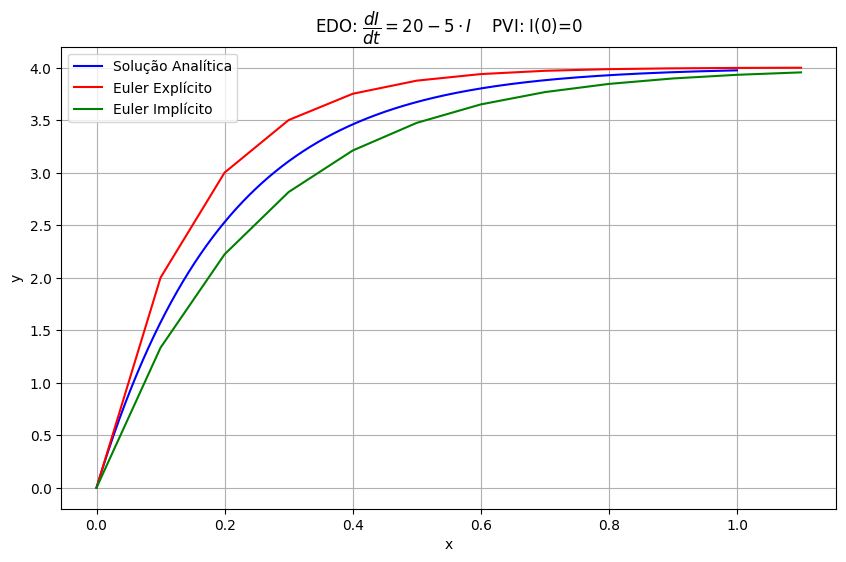

In [ ]:
# === v2 ===
# Criação do gráfico
fig, axs = plt.subplots(1, 1, figsize=(10, 6))
# fig.suptitle('Comparação entre os Métodos Numéricos e a Solução Analítica')
axs.plot(x_real, y_real, 'b', label='Solução Analítica')
axs.plot(x_exp, y_exp, 'r', label='Euler Explícito')
axs.plot(x_imp, y_imp, 'g', label='Euler Implícito')

# Adiciona título e rótulos
axs.set_title(r'EDO: $\dfrac{dI}{dt} = 20 - 5\cdot I$' + '\t PVI: I(0)=0')
axs.set_xlabel('x')
axs.set_ylabel('y')
axs.legend()
axs.grid(True)

plt.savefig("graf-euler-p1-passo1e-1.svg", format="svg", bbox_inches="tight", pad_inches=0)
# Exibe o gráfico
plt.show()

In [ ]:
tempo_exp1

4.124641418457031e-05

In [ ]:
tempo_imp1

0.00010752677917480469

### <font color='skyblue'>Problema 2</font> (Cálculo, Stewart, vol2, Ex5_Sec9.5_pg.560)
**Circuito elétrico com gerador de tensão variável**

$\dfrac{dI}{dt} = \dfrac{E}{L} - \dfrac{R}{L}\cdot I$

<br>

+ E(t) = $60\cdot sen(30\cdot t)$ [V]
+ L = 4 [H]
+ R = 12 [$\Omega$]

<font color='red'>
<strong>EDO:<strong>
$\dfrac{dI}{dt} = 15\cdot sen(30\cdot t) - 3\cdot I$</font><br><br>

<font color='red'>
<strong>PVI:<strong>
$I(0) = 0$</font>

In [ ]:
# DEFINIÇÃO DA FUNÇÃO QUE REPRESENTA A EDO
def F_diferencial(x, y):
    return 15*np.sin(30*x) - 3*y

# PROBLEMA DE VALOR INICIAL
x0 = 0  # Valor inicial de x
y0 = 0  # Valor inicial de y

In [ ]:
# FUNÇÃO SOLUÇÃO DA EDO COM PVI
def f_solucao(x):
    return 5/101 * (np.sin(30*x) - 10*np.cos(30*x)) + 50/101 * np.exp(-3*x)

In [ ]:
# -- Chama o Script Principal e salva as saídas
imp_file_name = 'prob2_out_imp.txt'
exp_file_name = 'prob2_out_exp.txt'
# out_exp2, out_imp2 : saídas dos cálculos em váriaveis na memória
out_exp2, tempo_exp2, out_imp2, tempo_imp2 = main(
    F_diferencial=F_diferencial,
    x0=x0,
    y0=y0,
    xn=1.0,
    passo=1e-1,
    imp_file_name=imp_file_name,
    exp_file_name=exp_file_name
)

<hr color='orange'>

In [ ]:
plt.ioff()

x_exp, y_exp = list(zip(*out_exp2))
x_imp, y_imp = list(zip(*out_imp2))
x_real = np.linspace(0,1,1000)
y_real = [f_solucao(x_i) for x_i in x_real]


# === v2 ===
# Criação do gráfico
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
# fig.suptitle('Comparação entre os Métodos Numéricos e a Solução Analítica')
fig.suptitle(r'EDO: $\dfrac{dI}{dt} = 15\cdot sen(30\cdot t) - 3\cdot I$' + '\t PVI: I(0)=0')

axs[0].plot(x_real, y_real, 'b', label='Solução Analítica')
axs[0].plot(x_exp, y_exp, 'r', label='Euler Explícito')
axs[0].plot(x_imp, y_imp, 'g', label='Euler Implícito')

# Adiciona título e rótulos
axs[0].set_title(r'passo = 1e-1', loc='left')
axs[0].set_xlabel('x')
axs[0].set_ylabel('y')
axs[0].legend()
axs[0].grid(True)

In [ ]:
# -- Chama o Script Principal e salva as saídas
imp_file_name = 'prob2_out_imp.txt'
exp_file_name = 'prob2_out_exp.txt'
# out_exp2, out_imp2 : saídas dos cálculos em váriaveis na memória
out_exp2, tempo_exp2, out_imp2, tempo_imp2 = main(
    F_diferencial=F_diferencial,
    x0=x0,
    y0=y0,
    xn=1.0,
    passo=1e-2,
    imp_file_name=imp_file_name,
    exp_file_name=exp_file_name
)

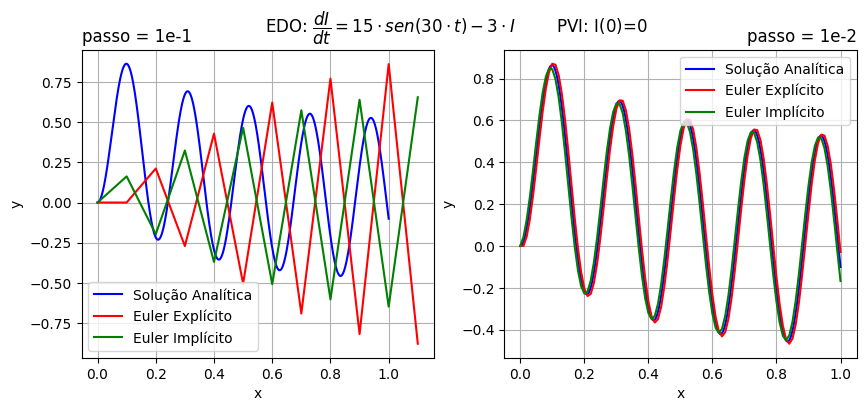

In [ ]:
plt.ioff()

x_exp, y_exp = list(zip(*out_exp2))
x_imp, y_imp = list(zip(*out_imp2))
x_real = np.linspace(0,1,1000)
y_real = [f_solucao(x_i) for x_i in x_real]

# fig.suptitle('Comparação entre os Métodos Numéricos e a Solução Analítica')
axs[1].plot(x_real, y_real, 'b', label='Solução Analítica')
axs[1].plot(x_exp, y_exp, 'r', label='Euler Explícito')
axs[1].plot(x_imp, y_imp, 'g', label='Euler Implícito')

# Adiciona título e rótulos
axs[1].set_title(r'passo = 1e-2', loc='right')
axs[1].set_xlabel('x')
axs[1].set_ylabel('y')
axs[1].legend()
axs[1].grid(True)

plt.savefig("graf-euler-p2-demo.svg", format="svg", bbox_inches="tight", pad_inches=0)
# Exibe o gráfico
plt.show()

---

In [ ]:
x_exp, y_exp = list(zip(*out_exp2))
x_imp, y_imp = list(zip(*out_imp2))
x_real = np.linspace(0,1,1000)
y_real = [f_solucao(x_i) for x_i in x_real]

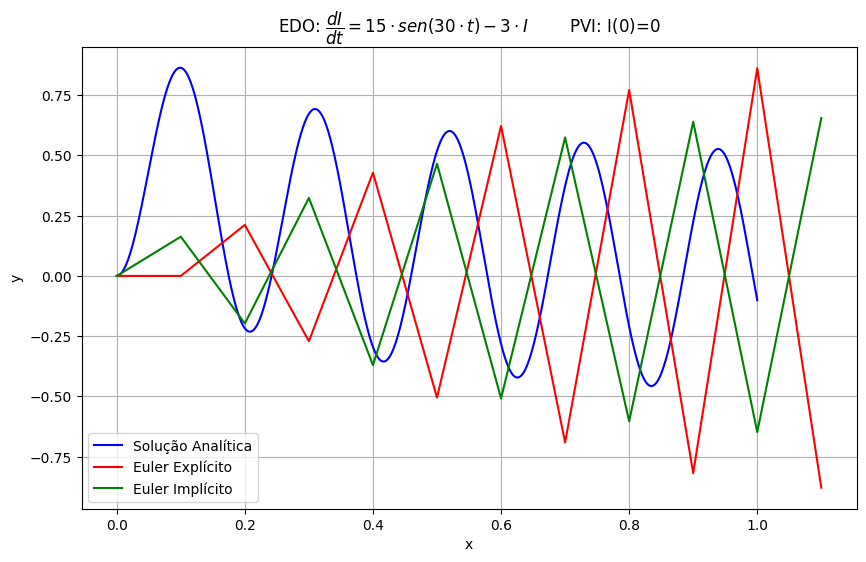

In [ ]:
# === v2 ===
# Criação do gráfico
fig, axs = plt.subplots(1, 1, figsize=(10, 6))
# fig.suptitle('Comparação entre os Métodos Numéricos e a Solução Analítica')
axs.plot(x_real, y_real, 'b', label='Solução Analítica')
axs.plot(x_exp, y_exp, 'r', label='Euler Explícito')
axs.plot(x_imp, y_imp, 'g', label='Euler Implícito')

# Adiciona título e rótulos
axs.set_title(r'EDO: $\dfrac{dI}{dt} = 15\cdot sen(30\cdot t) - 3\cdot I$' + '\t PVI: I(0)=0')
axs.set_xlabel('x')
axs.set_ylabel('y')
axs.legend()
axs.grid(True)

plt.savefig("graf-euler-p2-passo1e-1.svg", format="svg", bbox_inches="tight", pad_inches=0)
# Exibe o gráfico
plt.show()

### <font color='skyblue'>Problema 3</font> (Cálculo, Stewart, vol2, pg. 549)
**Crescimento populacional natural**

In [ ]:
# DEFINIÇÃO DA FUNÇÃO QUE REPRESENTA A EDO
def F_diferencial(x, y):
    return y

# PROBLEMA DE VALOR INICIAL
x0 = 0  # Valor inicial de x
y0 = 2  # Valor inicial de y
xn = 8  # Valor final de x

In [ ]:
# FUNÇÃO SOLUÇÃO DA EDO COM PVI
def f_solucao(x):
    # P0 * e^(constante * x)
    return y0 * np.exp(x)

In [ ]:
# -- Chama o Script Principal e salva as saídas
imp_file_name = 'prob3_out_imp.txt'
exp_file_name = 'prob3_out_exp.txt'
# out_exp3, out_imp3 : saídas dos cálculos em váriaveis na memória
out_exp3, tempo_exp3, out_imp3, tempo_imp3 = main(
    F_diferencial=F_diferencial,
    x0=x0,
    y0=y0,
    xn=xn,
    passo=1e-2,
    imp_file_name=imp_file_name,
    exp_file_name=exp_file_name
)

---

In [ ]:
x_exp, y_exp = list(zip(*out_exp3))
x_imp, y_imp = list(zip(*out_imp3))
x_real = np.linspace(0,xn,1000)
y_real = [f_solucao(x_i) for x_i in x_real]

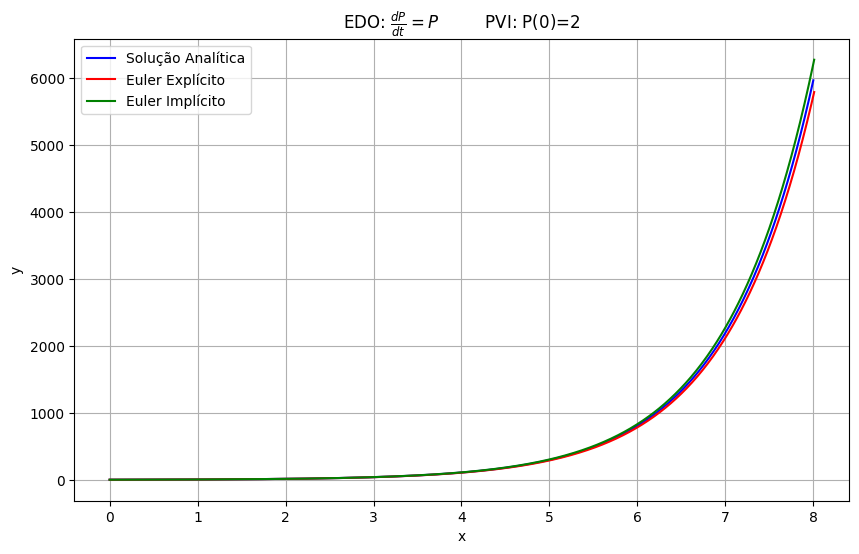

In [ ]:
# === v2 ===
# Criação do gráfico
fig, axs = plt.subplots(1, 1, figsize=(10, 6))
# fig.suptitle('Comparação entre os Métodos Numéricos e a Solução Analítica')
axs.plot(x_real, y_real, 'b', label='Solução Analítica')
axs.plot(x_exp, y_exp, 'r', label='Euler Explícito')
axs.plot(x_imp, y_imp, 'g', label='Euler Implícito')

# Adiciona título e rótulos
axs.set_title(r'EDO: $\frac{dP}{dt} = P$' + '\t PVI: P(0)=2')
axs.set_xlabel('x')
axs.set_ylabel('y')
axs.legend()
axs.grid(True)

plt.savefig("graf-euler-p3-passo1e-2.svg", format="svg", bbox_inches="tight", pad_inches=0)
# Exibe o gráfico
plt.show()

In [ ]:
tempo_exp2

0.004950761795043945

In [ ]:
tempo_imp2

0.012019157409667969

## <font color='lime'>Análises Estatísticas</font>

---
### <font color='orange'>Experimento 1: passo=1e-1</font>

In [ ]:
PASSO = 1e-1

In [ ]:
# DEFINIÇÃO DA FUNÇÃO QUE REPRESENTA A EDO
def F_diferencial(x, y):
    return 20 - 5*y

# PROBLEMA DE VALOR INICIAL
x0 = 0.0  # Valor inicial de x
y0 = 0.0  # Valor inicial de y

In [ ]:
# FUNÇÃO SOLUÇÃO DA EDO COM PVI
def f_solucao_1(x):
    return 4 - 4*np.exp(-5*x)

In [ ]:
# -- Chama o Script Principal e salva as saídas
imp_file_name = 'prob1_out_imp.txt'
exp_file_name = 'prob1_out_exp.txt'
# out_exp1, out_imp1 : saídas dos cálculos em váriaveis na memória
out_exp1, tempo_exp1, out_imp1, tempo_imp1 = main(
    F_diferencial=F_diferencial,
    x0=x0,
    y0=y0,
    xn=1.0,
    passo=PASSO,
    imp_file_name=imp_file_name,
    exp_file_name=exp_file_name
)

In [ ]:
# DEFINIÇÃO DA FUNÇÃO QUE REPRESENTA A EDO
def F_diferencial(x, y):
    return 15*np.sin(30*x) - 3*y

# PROBLEMA DE VALOR INICIAL
x0 = 0  # Valor inicial de x
y0 = 0  # Valor inicial de y

In [ ]:
# FUNÇÃO SOLUÇÃO DA EDO COM PVI
def f_solucao_2(x):
    return 5/101 * (np.sin(30*x) - 10*np.cos(30*x)) + 50/101 * np.exp(-3*x)

In [ ]:
# -- Chama o Script Principal e salva as saídas
imp_file_name = 'prob2_out_imp.txt'
exp_file_name = 'prob2_out_exp.txt'
# out_exp2, out_imp2 : saídas dos cálculos em váriaveis na memória
out_exp2, tempo_exp2, out_imp2, tempo_imp2 = main(
    F_diferencial=F_diferencial,
    x0=x0,
    y0=y0,
    xn=1.0,
    passo=PASSO,
    imp_file_name=imp_file_name,
    exp_file_name=exp_file_name
)

In [ ]:
# DEFINIÇÃO DA FUNÇÃO QUE REPRESENTA A EDO
def F_diferencial(x, y):
    return y

# PROBLEMA DE VALOR INICIAL
x0 = 0.0  # Valor inicial de x
y0 = 2.0  # Valor inicial de y
xn = 1.0  # Valor final de x

In [ ]:
# FUNÇÃO SOLUÇÃO DA EDO COM PVI
def f_solucao_3(x):
    # P0 * e^(taxa * x)
    return y0 * np.exp(x)

In [ ]:
# -- Chama o Script Principal e salva as saídas
imp_file_name = 'prob3_out_imp.txt'
exp_file_name = 'prob3_out_exp.txt'
# out_exp3, out_imp3 : saídas dos cálculos em váriaveis na memória
out_exp3, tempo_exp3, out_imp3, tempo_imp3 = main(
    F_diferencial=F_diferencial,
    x0=x0,
    y0=y0,
    xn=xn,
    passo=PASSO,
    imp_file_name=imp_file_name,
    exp_file_name=exp_file_name
)

---

In [ ]:
x_exp_p1, y_exp_p1 = list(zip(*out_exp1))
x_imp_p1, y_imp_p1 = list(zip(*out_imp1))
x_exp_p2, y_exp_p2 = list(zip(*out_exp2))
x_imp_p2, y_imp_p2 = list(zip(*out_imp2))
x_exp_p3, y_exp_p3 = list(zip(*out_exp3))
x_imp_p3, y_imp_p3 = list(zip(*out_imp3))

In [ ]:
sample_exp_p1 = np.abs(np.array(y_exp_p1) - np.array([f_solucao_1(x) for x in x_exp_p1]))
sample_imp_p1 = np.abs(np.array(y_imp_p1) - np.array([f_solucao_1(x) for x in x_imp_p1]))
sample_exp_p2 = np.abs(np.array(y_exp_p2) - np.array([f_solucao_2(x) for x in x_exp_p2]))
sample_imp_p2 = np.abs(np.array(y_imp_p2) - np.array([f_solucao_2(x) for x in x_imp_p2]))
sample_exp_p3 = np.abs(np.array(y_exp_p3) - np.array([f_solucao_3(x) for x in x_exp_p3]))
sample_imp_p3 = np.abs(np.array(y_imp_p3) - np.array([f_solucao_3(x) for x in x_imp_p3]))

In [ ]:
# Desativa exibição automática (modo iterativo off)
plt.ioff()

fig, axs = plt.subplots(1,3,figsize=(12,8))
fig.subplots_adjust(wspace=0.25)
# fig.suptitle('Boxplots dos resíduos dos métodos Explícito e Implícito')

dados = pd.DataFrame({
    'p1_exp': sample_exp_p1,
    'p1_imp': sample_imp_p1,
    'p2_exp': sample_exp_p2,
    'p2_imp': sample_imp_p2,
    'p3_exp': sample_exp_p3,
    'p3_imp': sample_imp_p3
})

# Reestruturando o dataframe para o formato longo (long format)
# https://pandas.pydata.org/docs/reference/api/pandas.melt.html#pandas.melt
dados_long = pd.melt(dados, var_name='Tipo', value_name='Resíduo')
# id_vars=None | value_vars=Todas as colunas não especificadas em "id_vars" (no caso todas)

# axs.set_title('Boxplots dos resíduos dos métodos Explícito e Implícito')
axs[0].set_title('Experimento 1: passo=1e-1')
axs[0].set_xlabel('Problema X Método')
axs[0].set_ylabel(' ')
axs[0].tick_params(axis='x', rotation=90)

valor_maximo = dados_long['Resíduo'].max()
valor_maximo = (1 if (valor_maximo < 1) else valor_maximo) * 100
axs[0].set_yticks([i/100 for i in range(0,int(valor_maximo)+2,2)])
axs[0].set_ylim(0, valor_maximo/100) # (0,1)
axs[0].grid(linestyle='--')

sns.boxplot(
    dados_long,
    x='Tipo',
    y='Resíduo',
    ax=axs[0],
    hue='Tipo',
    legend=False
)

# Fecha a figura temporária da memória (impede acúmulo)
# plt.close(fig)

<Axes: title={'center': 'Experimento 1: passo=1e-1'}, xlabel='Problema X Método', ylabel=' '>

---
### <font color='orange'>Experimento 2: passo=1e-2</font>

In [ ]:
PASSO = 1e-2

In [ ]:
# DEFINIÇÃO DA FUNÇÃO QUE REPRESENTA A EDO
def F_diferencial(x, y):
    return 20 - 5*y

# PROBLEMA DE VALOR INICIAL
x0 = 0.0  # Valor inicial de x
y0 = 0.0  # Valor inicial de y

In [ ]:
# FUNÇÃO SOLUÇÃO DA EDO COM PVI
def f_solucao_1(x):
    return 4 - 4*np.exp(-5*x)

In [ ]:
# -- Chama o Script Principal e salva as saídas
imp_file_name = 'prob1_out_imp.txt'
exp_file_name = 'prob1_out_exp.txt'
# out_exp1, out_imp1 : saídas dos cálculos em váriaveis na memória
out_exp1, tempo_exp1, out_imp1, tempo_imp1 = main(
    F_diferencial=F_diferencial,
    x0=x0,
    y0=y0,
    xn=1.0,
    passo=PASSO,
    imp_file_name=imp_file_name,
    exp_file_name=exp_file_name
)

In [ ]:
# DEFINIÇÃO DA FUNÇÃO QUE REPRESENTA A EDO
def F_diferencial(x, y):
    return 15*np.sin(30*x) - 3*y

# PROBLEMA DE VALOR INICIAL
x0 = 0  # Valor inicial de x
y0 = 0  # Valor inicial de y

In [ ]:
# FUNÇÃO SOLUÇÃO DA EDO COM PVI
def f_solucao_2(x):
    return 5/101 * (np.sin(30*x) - 10*np.cos(30*x)) + 50/101 * np.exp(-3*x)

In [ ]:
# -- Chama o Script Principal e salva as saídas
imp_file_name = 'prob2_out_imp.txt'
exp_file_name = 'prob2_out_exp.txt'
# out_exp2, out_imp2 : saídas dos cálculos em váriaveis na memória
out_exp2, tempo_exp2, out_imp2, tempo_imp2 = main(
    F_diferencial=F_diferencial,
    x0=x0,
    y0=y0,
    xn=1.0,
    passo=PASSO,
    imp_file_name=imp_file_name,
    exp_file_name=exp_file_name
)

In [ ]:
# DEFINIÇÃO DA FUNÇÃO QUE REPRESENTA A EDO
def F_diferencial(x, y):
    return y

# PROBLEMA DE VALOR INICIAL
x0 = 0.0  # Valor inicial de x
y0 = 2.0  # Valor inicial de y
xn = 1.0  # Valor final de x

In [ ]:
# FUNÇÃO SOLUÇÃO DA EDO COM PVI
def f_solucao_3(x):
    # P0 * e^(taxa * x)
    return y0 * np.exp(x)

In [ ]:
# -- Chama o Script Principal e salva as saídas
imp_file_name = 'prob3_out_imp.txt'
exp_file_name = 'prob3_out_exp.txt'
# out_exp3, out_imp3 : saídas dos cálculos em váriaveis na memória
out_exp3, tempo_exp3, out_imp3, tempo_imp3 = main(
    F_diferencial=F_diferencial,
    x0=x0,
    y0=y0,
    xn=xn,
    passo=PASSO,
    imp_file_name=imp_file_name,
    exp_file_name=exp_file_name
)

---

In [ ]:
x_exp_p1, y_exp_p1 = list(zip(*out_exp1))
x_imp_p1, y_imp_p1 = list(zip(*out_imp1))
x_exp_p2, y_exp_p2 = list(zip(*out_exp2))
x_imp_p2, y_imp_p2 = list(zip(*out_imp2))
x_exp_p3, y_exp_p3 = list(zip(*out_exp3))
x_imp_p3, y_imp_p3 = list(zip(*out_imp3))

In [ ]:
sample_exp_p1 = np.abs(np.array(y_exp_p1) - np.array([f_solucao_1(x) for x in x_exp_p1]))
sample_imp_p1 = np.abs(np.array(y_imp_p1) - np.array([f_solucao_1(x) for x in x_imp_p1]))
sample_exp_p2 = np.abs(np.array(y_exp_p2) - np.array([f_solucao_2(x) for x in x_exp_p2]))
sample_imp_p2 = np.abs(np.array(y_imp_p2) - np.array([f_solucao_2(x) for x in x_imp_p2]))
sample_exp_p3 = np.abs(np.array(y_exp_p3) - np.array([f_solucao_3(x) for x in x_exp_p3]))
sample_imp_p3 = np.abs(np.array(y_imp_p3) - np.array([f_solucao_3(x) for x in x_imp_p3]))

In [ ]:
plt.ioff()
# plt.ion() # Reabilita a exibição automática (modo iterativo on)

dados = pd.DataFrame({
    'p1_exp': sample_exp_p1,
    'p1_imp': sample_imp_p1,
    'p2_exp': sample_exp_p2,
    'p2_imp': sample_imp_p2,
    'p3_exp': sample_exp_p3,
    'p3_imp': sample_imp_p3
})

# Reestruturando o dataframe para o formato longo (long format)
# https://pandas.pydata.org/docs/reference/api/pandas.melt.html#pandas.melt
dados_long = pd.melt(dados, var_name='Tipo', value_name='Resíduo')
# id_vars=None | value_vars=Todas as colunas não especificadas em "id_vars" (no caso todas)


axs[1].set_title('Experimento 2: passo=1e-2')
axs[1].set_xlabel('Problema X Método')
axs[1].set_ylabel(' ')
axs[1].tick_params(axis='x', rotation=90)

max_sec = dados_long['Resíduo'].max()
valor_maximo = (valor_maximo if (valor_maximo > max_sec) else max_sec)
axs[1].set_yticks([i/100 for i in range(0,int(valor_maximo)+2,2)])
axs[1].set_ylim(0, valor_maximo/100) # (0,1)
axs[1].grid(linestyle='--')

sns.boxplot(
    dados_long,
    x='Tipo',
    y='Resíduo',
    ax=axs[1],
    hue='Tipo',
    legend=False
)

<Axes: title={'center': 'Experimento 2: passo=1e-2'}, xlabel='Problema X Método', ylabel=' '>

---
### <font color='orange'>Experimento 3: passo=1e-3</font>

In [ ]:
PASSO = 1e-3

In [ ]:
# DEFINIÇÃO DA FUNÇÃO QUE REPRESENTA A EDO
def F_diferencial(x, y):
    return 20 - 5*y

# PROBLEMA DE VALOR INICIAL
x0 = 0.0  # Valor inicial de x
y0 = 0.0  # Valor inicial de y

In [ ]:
# FUNÇÃO SOLUÇÃO DA EDO COM PVI
def f_solucao_1(x):
    return 4 - 4*np.exp(-5*x)

In [ ]:
# -- Chama o Script Principal e salva as saídas
imp_file_name = 'prob1_out_imp.txt'
exp_file_name = 'prob1_out_exp.txt'
# out_exp1, out_imp1 : saídas dos cálculos em váriaveis na memória
out_exp1, tempo_exp1, out_imp1, tempo_imp1 = main(
    F_diferencial=F_diferencial,
    x0=x0,
    y0=y0,
    xn=1.0,
    passo=PASSO,
    imp_file_name=imp_file_name,
    exp_file_name=exp_file_name
)

In [ ]:
# DEFINIÇÃO DA FUNÇÃO QUE REPRESENTA A EDO
def F_diferencial(x, y):
    return 15*np.sin(30*x) - 3*y

# PROBLEMA DE VALOR INICIAL
x0 = 0  # Valor inicial de x
y0 = 0  # Valor inicial de y

In [ ]:
# FUNÇÃO SOLUÇÃO DA EDO COM PVI
def f_solucao_2(x):
    return 5/101 * (np.sin(30*x) - 10*np.cos(30*x)) + 50/101 * np.exp(-3*x)

In [ ]:
# -- Chama o Script Principal e salva as saídas
imp_file_name = 'prob2_out_imp.txt'
exp_file_name = 'prob2_out_exp.txt'
# out_exp2, out_imp2 : saídas dos cálculos em váriaveis na memória
out_exp2, tempo_exp2, out_imp2, tempo_imp2 = main(
    F_diferencial=F_diferencial,
    x0=x0,
    y0=y0,
    xn=1.0,
    passo=PASSO,
    imp_file_name=imp_file_name,
    exp_file_name=exp_file_name
)

In [ ]:
# DEFINIÇÃO DA FUNÇÃO QUE REPRESENTA A EDO
def F_diferencial(x, y):
    return y

# PROBLEMA DE VALOR INICIAL
x0 = 0.0  # Valor inicial de x
y0 = 2.0  # Valor inicial de y
xn = 1.0  # Valor final de x

In [ ]:
# FUNÇÃO SOLUÇÃO DA EDO COM PVI
def f_solucao_3(x):
    # P0 * e^(taxa * x)
    return y0 * np.exp(x)

In [ ]:
# -- Chama o Script Principal e salva as saídas
imp_file_name = 'prob3_out_imp.txt'
exp_file_name = 'prob3_out_exp.txt'
# out_exp3, out_imp3 : saídas dos cálculos em váriaveis na memória
out_exp3, tempo_exp3, out_imp3, tempo_imp3 = main(
    F_diferencial=F_diferencial,
    x0=x0,
    y0=y0,
    xn=xn,
    passo=PASSO,
    imp_file_name=imp_file_name,
    exp_file_name=exp_file_name
)

---

In [ ]:
x_exp_p1, y_exp_p1 = list(zip(*out_exp1))
x_imp_p1, y_imp_p1 = list(zip(*out_imp1))
x_exp_p2, y_exp_p2 = list(zip(*out_exp2))
x_imp_p2, y_imp_p2 = list(zip(*out_imp2))
x_exp_p3, y_exp_p3 = list(zip(*out_exp3))
x_imp_p3, y_imp_p3 = list(zip(*out_imp3))

In [ ]:
sample_exp_p1 = np.abs(np.array(y_exp_p1) - np.array([f_solucao_1(x) for x in x_exp_p1]))
sample_imp_p1 = np.abs(np.array(y_imp_p1) - np.array([f_solucao_1(x) for x in x_imp_p1]))
sample_exp_p2 = np.abs(np.array(y_exp_p2) - np.array([f_solucao_2(x) for x in x_exp_p2]))
sample_imp_p2 = np.abs(np.array(y_imp_p2) - np.array([f_solucao_2(x) for x in x_imp_p2]))
sample_exp_p3 = np.abs(np.array(y_exp_p3) - np.array([f_solucao_3(x) for x in x_exp_p3]))
sample_imp_p3 = np.abs(np.array(y_imp_p3) - np.array([f_solucao_3(x) for x in x_imp_p3]))

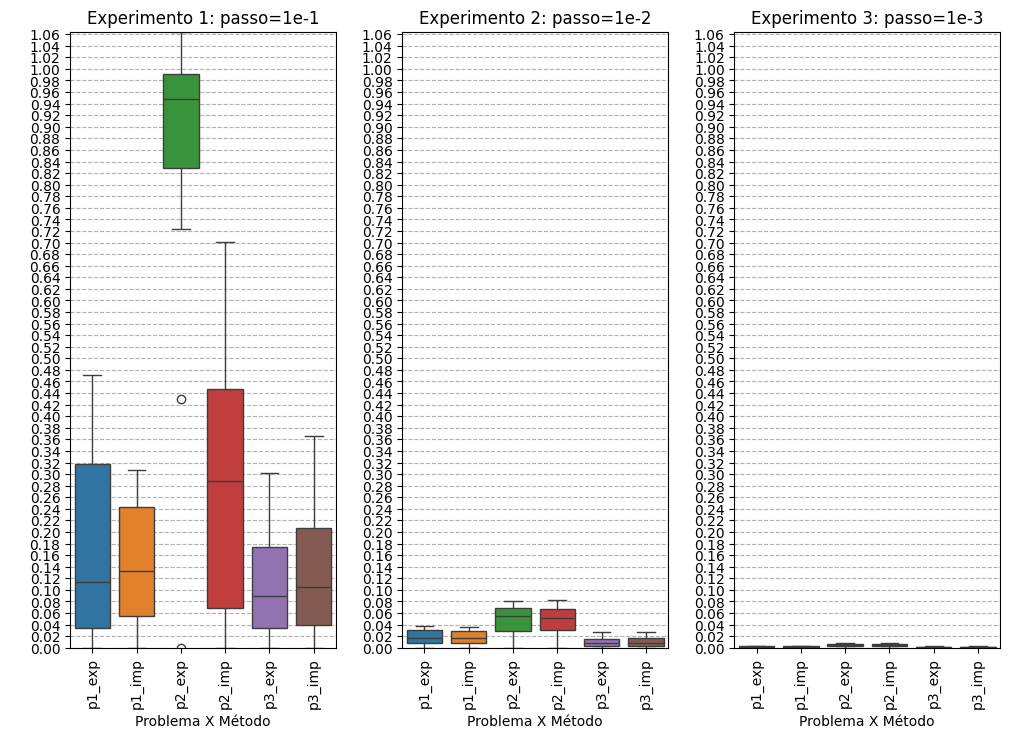

In [ ]:
plt.ioff()
# plt.ion() # Reabilita a exibição automática (modo iterativo on)

dados = pd.DataFrame({
    'p1_exp': sample_exp_p1,
    'p1_imp': sample_imp_p1,
    'p2_exp': sample_exp_p2,
    'p2_imp': sample_imp_p2,
    'p3_exp': sample_exp_p3,
    'p3_imp': sample_imp_p3
})

# Reestruturando o dataframe para o formato longo (long format)
# https://pandas.pydata.org/docs/reference/api/pandas.melt.html#pandas.melt
dados_long = pd.melt(dados, var_name='Tipo', value_name='Resíduo')
# id_vars=None | value_vars=Todas as colunas não especificadas em "id_vars" (no caso todas)

# axs.set_title('Boxplots dos resíduos dos métodos Explícito e Implícito')
axs[2].set_title('Experimento 3: passo=1e-3')
axs[2].set_xlabel('Problema X Método')
axs[2].set_ylabel(' ')
axs[2].tick_params(axis='x', rotation=90)

max_sec = dados_long['Resíduo'].max()
valor_maximo = (valor_maximo if (valor_maximo > max_sec) else max_sec)
axs[2].set_yticks([i/100 for i in range(0,int(valor_maximo)+2,2)])
axs[2].set_ylim(0, valor_maximo/100) # (0,1)
axs[2].grid(linestyle='--')

sns.boxplot(
    dados_long,
    x='Tipo',
    y='Resíduo',
    ax=axs[2],
    hue='Tipo',
    legend=False
)

plt.savefig("boxplots-residuos-experimentos.svg", format="svg", bbox_inches="tight", pad_inches=0)
plt.show()